## Part A

In [92]:
import pandas as pd

df_emails = pd.read_csv('..\..\practical_labs\Lab2_dataset.csv')

In [93]:
df_emails.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [94]:
df_emails.shape

(5171, 4)

In [95]:
df_emails['text'].isna().values.any()

False

In [96]:
df_emails['text'].isnull().values.any()

False

In [97]:
X = df_emails['text']
y = df_emails['label_num']

In [98]:
X.shape

(5171,)

In [99]:
y.shape

(5171,)

In [100]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duygu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


There are commonly used words in English, and they are not distinctive in terms of the content of an email. So, we should eliminate them and also punctuation marks. In this dataset, there also most frequently words like 'Subject', 're', 'cc', 'from','com'. So, I also removed them.

In [101]:
email_words_omit = ['Subject', 're', 'cc', 'from','com']
words_to_omit = stopwords.words('english')
words_to_omit = words_to_omit + email_words_omit

In [102]:
words_to_omit

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [103]:

def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in words_to_omit])

In [104]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

X_tokenized = X.apply(text_process)

In [105]:
X_tokenized.shape

(5171,)

In [106]:
vectorizer = CountVectorizer(max_df = 0.9, min_df = 7)
X_vectorized = vectorizer.fit_transform(X_tokenized)

In [107]:
X_vectorized.shape

(5171, 6274)

In [108]:
X_vectorized.toarray().shape

(5171, 6274)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train.toarray(), y_train)

GaussianNB()

In [111]:
# Calculate accuracy
score_gauss = model.score(X_test.toarray(), y_test)
print(f'Accuracy of Gaussian Classifier : {score_gauss}')

Accuracy of Gaussian Classifier : 0.957487922705314


Check confusion matrix


In [132]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test.toarray())
confusion_matrix(y_test, y_pred)

array([[715,  27],
       [ 17, 276]], dtype=int64)

Try to predict some test samples, whether they are spam or not, I selected some samples that are known to be ham and spam.

In [112]:
ham_email = ''' Subject: to : all domestic employees who participate in the enron corp
savings plan
october 26 is fast approaching !
mark your calendar - -
as the enron corp . savings plan moves to a new administrator !
as a savings plan participant , friday , october 26 at 3 : 00 pm cst will be your last day to :
? transfer investment fund balances and make contribution allocation changes
? change your contribution rate for the november 15 th payroll deductions
? enroll if you were hired before october 1
two important reminders :
? vanguard lifestrategy investment options are being replaced with fidelity freedom funds and ;
? your funds will remain invested in the funds chosen as of 3 : 00 pm cst until 8 : 00 am november 20 .
at 8 : 00 am cst , november 20 the savings plan system re - opens with great new features .
should you need assistance during the transition period , call ext . 3 - 7979 and press option 6 . this option will be available from 8 : 00 am cst october 29 until 5 : 00 pm cst november 19 .
enron benefits . . . keeping pace with your lifestyle .'''

spam_email = '''Subject: vlc , 0 dln for sale , no prior pres . crip . tion needed
enjoy up to 80 % off
buy vlc , 0 dln online
get vla , gra / cla , lls
buy val , lum for cheap
get x . a . x . a . x online from our online pha , rmacy .
many others also available !
no p . r . e , s . c . r , i . p . t . i . o . n required
discreet / fast shipping . plus * no shipping charge *
and always 100 % money back guarantee
click here for more info
'''

In [113]:
emails = [ham_email, spam_email]
emails_count = vectorizer.transform(emails)
model.predict(emails_count.toarray())

array([0, 1], dtype=int64)

As we see, it predicts ham(0) and spam(1) emails correctly.

### Multinomial classification

In [114]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB()
model_mult.fit(X_train.toarray(), y_train)

MultinomialNB()

In [115]:
score_mult = model_mult.score(X_test.toarray(), y_test)
print(f'Accuracy of Multinomial classifier : {score_mult}')

Accuracy of Multinomial classifier : 0.961352657004831


In [133]:
y_pred = model_mult.predict(X_test.toarray())
confusion_matrix(y_test, y_pred)

array([[713,  29],
       [ 11, 282]], dtype=int64)

In [116]:
model_mult.predict(emails_count)

array([0, 1], dtype=int64)

When we compare the accuracy scores of Gaussian and Multinomial classification models on the dataset, Multinomial model shows better performance.<br>
96% > 95% . In terms of presicion and recall rates, there are not so much difference between them.

Cross validation accuracies

In [117]:
from sklearn.model_selection import cross_val_score

In [127]:
scores_gauss = cross_val_score(model, X_vectorized.toarray(), y, cv=3)
scores_gauss

array([0.97041763, 0.96519722, 0.9587928 ])

In [128]:
score_gauss.mean()

0.957487922705314

In [129]:
scores_multi = cross_val_score(model_mult, X_vectorized.toarray(), y, cv=3)
scores_multi

array([0.9599768 , 0.95823666, 0.95995357])

In [130]:
scores_multi.mean()

0.9593890088107804

Multinomial classifier seems to generalize different dubsets of data better. For each split, there is less variance in accuracy of multinomial classifier.

## Part B

In [ ]:
df_airbnb = pd.read_csv('..\..\practical_labs\AB_NYC_2019.csv')
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Look statistical overview of the price data.

In [ ]:
df_airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Price data is treated like a discrete data here. So, it is better to detect outlier by analyzing percentiles. Let's firstly look at observations with their  price per night = NaN, and eliminate them.

In [ ]:
print(df_airbnb['price'].isna().values.any())
print(df_airbnb['price'].isnull().values.any())

False
False


No sample with value price = NaN

In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad8ba8ae50>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad8ba98190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad8ba8a590>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad8ba99450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad8ba99b50>],
 'means': []}

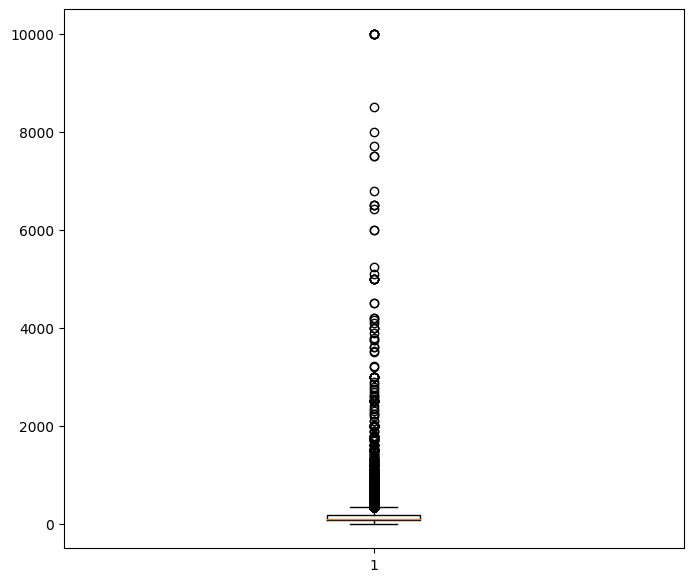

In [ ]:
fig = plt.figure(figsize =(8, 7))
plt.boxplot(df_airbnb['price'])

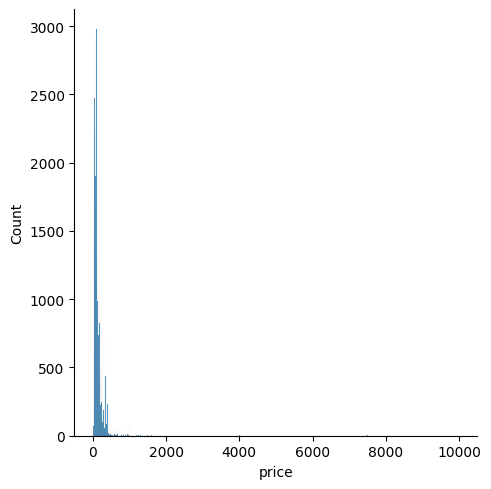

In [ ]:
import seaborn as sns

sns.displot(df_airbnb.price)
plt.show() 

As we observe from the graphs, price data is cluttered between 0 - 2000. The data is highly imbalanced and there seem to be many outliers. It doesn't fit Gaussian Distribution. We can take 1.5*IQR or 2*IQR according to the number of outliers between these interquartile ranges. Because, too many data point are above 75% quartile range, if we omit all of it, we can loose many data.

In [ ]:
q3 = df_airbnb.price.quantile(q=0.75)
q3

175.0

In [ ]:
(df_airbnb.price > q3).sum() / df_airbnb.price.count()

0.24904386951631047

24% of the price data is above 75% percentile. 

In [ ]:
# Calculate Inter Quartile Range (IQR)
q1 = df_airbnb.price.quantile(q=0.25)
iqr_price = q3 - q1
iqr_price

106.0

In [ ]:
(df_airbnb.price > q3 + 1.5 * iqr_price).sum() / df_airbnb.price.count()

0.06078331117701197

In [ ]:
(df_airbnb.price > q3 + 2 * iqr_price).sum() / df_airbnb.price.count()

0.04454443194600675

In [ ]:
# number of data points smaller than 1.5*IQR range

(df_airbnb.price < q1 - 1.5 * iqr_price).sum() 

0

I decided to remove 6% of the data greater than (Q3 + 1.5 * IQR). Our decision range will be <br>
Lower Bound: (Q1 - 1.5 * IQR) <br>
Upper Bound: (Q3 + 1.5 * IQR) <br>
Anything outside this range will be outlier.

In [ ]:
lower_bound = q1 - 1.5 * iqr_price
upper_bound = q3 + 1.5 * iqr_price

In [ ]:
filter = (df_airbnb.price >= lower_bound) & (df_airbnb.price <= upper_bound)
filter

0        True
1        True
2        True
3        True
4        True
         ... 
48890    True
48891    True
48892    True
48893    True
48894    True
Name: price, Length: 48895, dtype: bool

In [ ]:
# remove outliers
df_airbnb_outliers_removed = df_airbnb.loc[filter]

Draw boxplot and distribution plots of new dataset with most of the outliers are removed.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad8e1036d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad8e08a710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad8e102410>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad8e088290>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad8e089490>],
 'means': []}

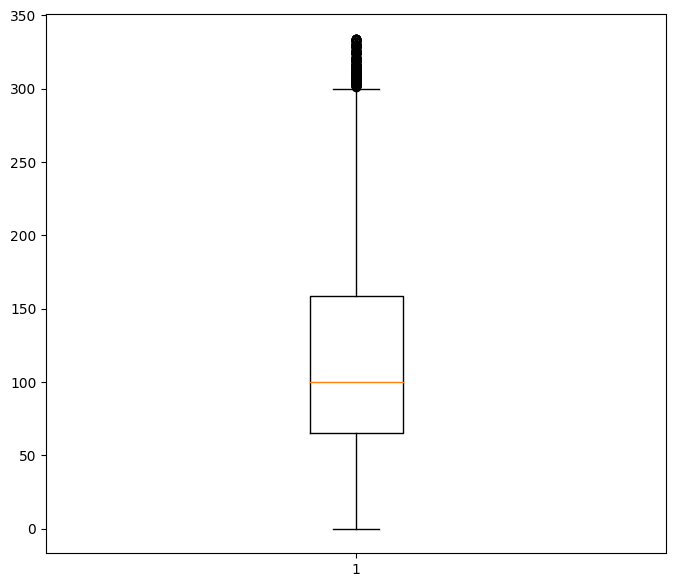

In [ ]:
fig = plt.figure(figsize =(8, 7))
plt.boxplot(df_airbnb_outliers_removed['price'])

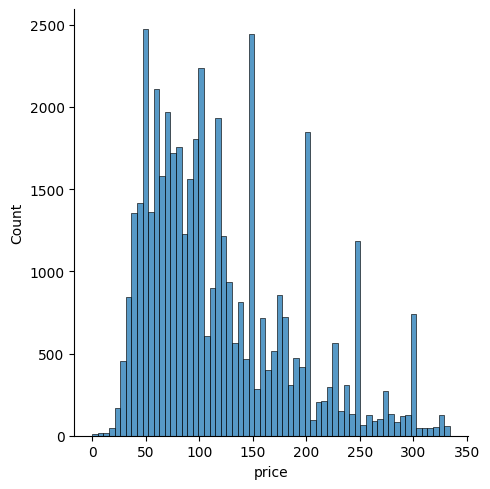

In [ ]:
sns.displot(df_airbnb_outliers_removed['price'])
plt.show() 